# Tuning hyper-parameters of the Emphatic-TD on a five states model

For this example, we will be working on the model defined by Sutton below :

<img src="https://github.com/Nicotous1/EmpathicTD/raw/master/docs/five_states.png">

We want to estimate the value of each state under the policy $\pi$ while behaving under $\mu$. This is an off-learning problem. You can quickly verify that the value under $\pi$ is $v_\pi = (4, 3, 2, 1, 1)$.

We want to compare the off-TD and the emphatic-TD of Sutton on this example. To do so, we are going to use the class "comparatorTD" that will help us to compute and plot results for each algorithm.

## Imports

In [1]:
# Usual imports
import numpy as np
import matplotlib.pyplot as plt

# Import the library folder to Python libraries.
import sys
sys.path.insert(0, "../library/") # Path of the library

# Library imports
from TD import EmphaticTD, OffTD # the algorithm to use
from models import Model # The class to define our model
from policies import Policy, LeftRightPolicy, RandomPolicy # All the policies available for such model
from utils import comparatorTD # Tool to evaluate the TD algorithms on a model

In [2]:
# To make nice plot for Latex
%matplotlib notebook
plt.rcParams.update({'font.size': 13}) # for Latex
plt.rcParams['figure.figsize'] = [8, 5]

## Quick definition of the model

In [3]:
# Define the model
model = Model(
            ## Model definition
                # features function
                features = np.identity(5), 
                R = np.ones((5,5)), # transition reward
                pi = LeftRightPolicy(p_right = 1), # target policy
                mu = LeftRightPolicy(p_left = 2/3), # behavior policy
                v_pi = [4, 3, 2, 1, 1], # state value under pi
    
            ## Parameters for TD
                I = np.ones(5), # interest function
                discounts = [0, 1, 1, 1, 0], # discount function
    
            ## Initialisation
                S0 = 0,
                theta0 = np.zeros(5),
             ) 

## Tuning $\alpha$ with the comparator

### Define and run the comparator

A comparator is easy to define just give the algorithm you want to use and some plot characteristics if you want.

In [4]:
# The algorithm you want to compare
alphas = [0.1, 0.05, 0.01, 0.005, 0.001]
colors = ['#d73027','#fc8d59','green','#91bfdb','#4575b4'] # Nice palette
algos = []
for x in alphas:
    algos.append(EmphaticTD(alpha = x, lambdas=0))

# Build the comparator
comparator = comparatorTD(algos, colors = colors, names = alphas)

# Run the comparator
comparator.run(model, T = 2000, N = 100)

emphatic TD has been computed for 2000 steps and 100 particles.
emphatic TD has been computed for 2000 steps and 100 particles.
emphatic TD has been computed for 2000 steps and 100 particles.
emphatic TD has been computed for 2000 steps and 100 particles.
emphatic TD has been computed for 2000 steps and 100 particles.


### Plot the MSVE to see performance

<IPython.core.display.Javascript object>


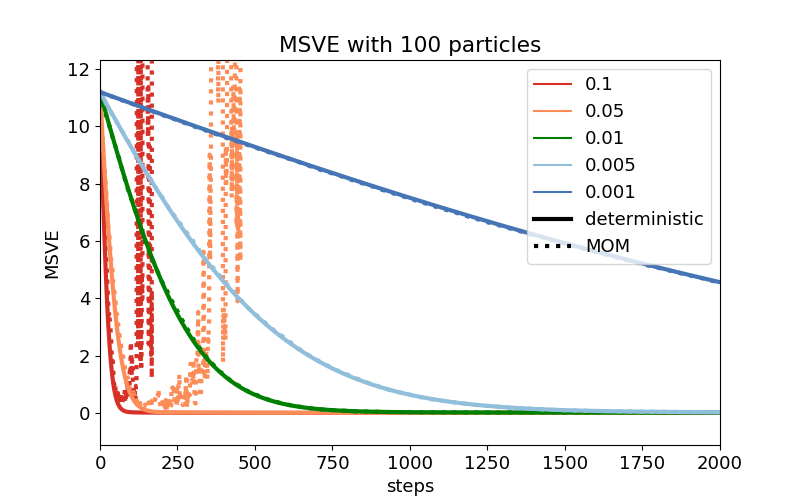

In [5]:
comparator.plot_msve(particles=False, mom = True, optimal=True)

As you can see when $\alpha$ is too big, the emphatic becomes unstable. Here the best choice would be $\alpha = 0.01$.

## Tuning $\lambda$ with the comparator

### Define and run the comparator

In [6]:
# The algorithm you want to compare
lambdas = [0, 0.25, 0.5, 0.75, 1]
colors = ['#d73027','#fc8d59','green','#91bfdb','#4575b4'] # Nice palette
algos = []
for x in lambdas:
    algos.append(EmphaticTD(alpha = 0.01, lambdas=x))

# Build the comparator
comparator = comparatorTD(algos, colors = colors, names = lambdas)

# Run the comparator
comparator.run(model, T = 2000, N = 100)

emphatic TD has been computed for 2000 steps and 100 particles.
emphatic TD has been computed for 2000 steps and 100 particles.
emphatic TD has been computed for 2000 steps and 100 particles.
emphatic TD has been computed for 2000 steps and 100 particles.
emphatic TD has been computed for 2000 steps and 100 particles.


### Plot the MSVE to see performance

<IPython.core.display.Javascript object>


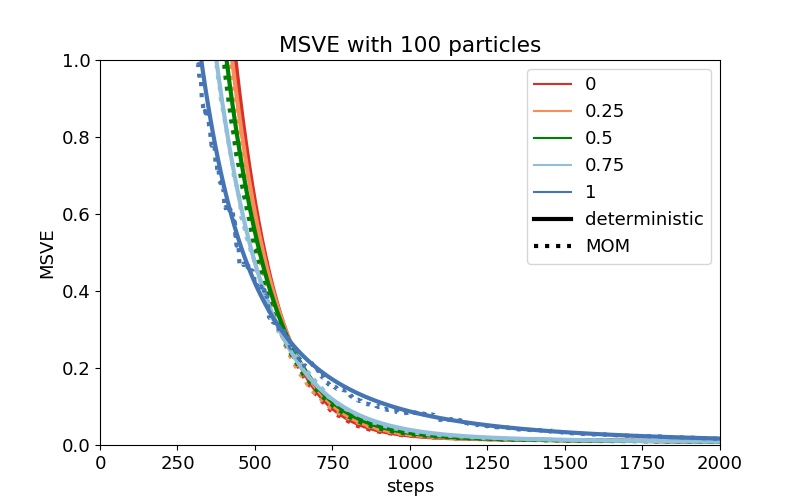

In [7]:
comparator.plot_msve(particles=False, mom = True, optimal=True, ylim=(0, 1))

# Conclusion

The comparator can plot quickly the performance for different hyper-parameters. However with a lot of parameter it can become difficult to optimize. Then some library of optimisation like hyperopt could be use.